#Regressão Logística

In [ ]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

###Base risco de crédito

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/risco_credito.pkl','rb') as f:
  X_risco_credito, y_risco_credito=pickle.load(f)

In [ ]:
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [ ]:
X_risco_credito=np.delete(X_risco_credito,[2,7,11],axis=0)
y_risco_credito=np.delete(y_risco_credito,[2,7,11],axis=0)

In [ ]:
len(X_risco_credito), len(y_risco_credito)

(11, 11)

In [ ]:
logistic_risco_credit=LogisticRegression(random_state=1)

In [ ]:
logistic_risco_credit.fit(X_risco_credito,y_risco_credito)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_risco_credit.intercept_ #Global

array([-0.80828993])

In [ ]:
logistic_risco_credit.coef_ #Pesos locais de cada atributo

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [ ]:
#História boa, dívida alta, garantia nenhuma, renda > 35
#História ruim, dívida alta, garantia adequada, renda < 15
previsoes1=logistic_risco_credit.predict([[0,0,1,2],[2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

###Base Credit Data

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste=pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
logistic_credit=LogisticRegression(random_state=1)

In [ ]:
logistic_credit.fit(X_credit_treinamento,y_credit_treinamento);

In [ ]:
logistic_credit.intercept_ 

array([-6.02976095])

In [ ]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [ ]:
previsoes=logistic_credit.predict(X_credit_teste)

In [ ]:
accuracy_score(y_credit_teste,previsoes)  

0.946

0.946

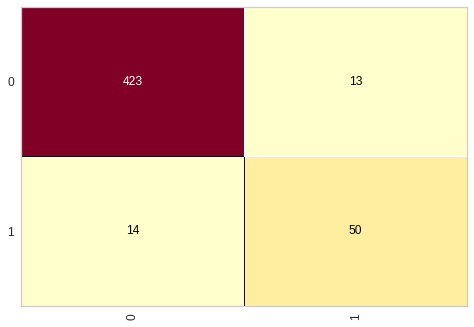

In [ ]:
cm=ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento,y_credit_treinamento)
cm.score(X_credit_teste,y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



###Base Census

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste=pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
logistic_census=LogisticRegression(random_state=1)

In [ ]:
logistic_census.fit(X_census_treinamento,y_census_treinamento);

In [ ]:
previsoes=logistic_census.predict(X_census_teste)

In [ ]:
accuracy_score(y_census_teste,previsoes)

0.849539406345957

0.849539406345957

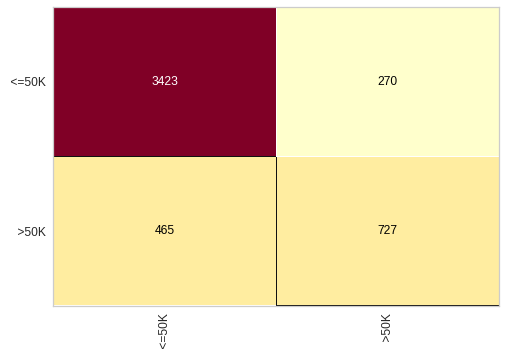

In [ ]:
cm=ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento,y_census_treinamento)
cm.score(X_census_teste,y_census_teste)

In [ ]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

